In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Первичная обработка

In [23]:
# Импорт данных 
data = pd.read_csv('vehicleM.dat', delimiter=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
3,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
4,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus


In [24]:
# Зададим заголовки
headers = ['Compactness', 'Circularity','Distance_circularity', 'Radius_ratio', 'Praxis_aspect_ratio', 'Max_length_aspect_ratio', 'Scatter_ratio', 'Elongatedness', 'Praxis_rectangular', 'Length_rectangular', 'Major_variance', 'Minor_variance', 'Gyration_radius', 'Major_skewness', 'Minor_skewness', 'Minor_kurtosis', 'Major_kurtosis', 'Hollows_ratio', 'Class'] 
data.columns = headers
data.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
3,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
4,107.0,57.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus


In [25]:
# Посмотрим дубликаты
duplicates = data[data.duplicated()]
duplicates

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class


Дубликаты по строкам отстутствуют, удалять не требуется. Теперь оценим выборсы.

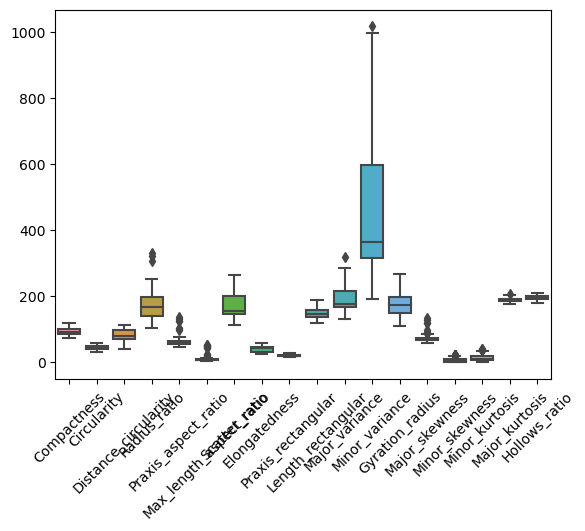

In [26]:
# Посмотрим на Boxplot
sns.boxplot(data=data)
plt.xticks(rotation=45)  # Поворот меток оси x для лучшей читаемости
plt.show()

Выбросов не очень много, удалим их по межквартильному размеху IQR.

In [27]:
# Применим только для числовых столбцов
numeric_columns = data.select_dtypes(include=['number'])

# Удалим выборсы по IQR
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Применим только для числовых столбцов
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))
data = data[~outliers.any(axis=1)]

In [28]:
data.shape

(642, 19)

Удалилось немного строк, всего 33, это не сильно отразится на результате, поэтому метод удаления признан мной удовлетворительным. Далее было решено стандартизовать данные, так как он имеют разный масштаб. Далее будем работать со стандартизованными числовыми данными.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)
data = pd.DataFrame(scaled_data, columns=numeric_columns.columns)
data.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
0,0.149183,0.504754,0.051689,0.257109,1.251218,0.296293,-0.206681,0.135702,-0.226085,0.754836,-0.397342,-0.345766,0.286460,-0.305616,-0.087656,0.372751,-0.322598,0.156242
1,-0.329335,-0.621895,0.114648,-0.840113,-0.594215,0.081845,-0.593049,0.516872,-0.606268,-0.345772,-0.586521,-0.619856,-0.500968,-0.045910,0.512906,0.150449,-0.003072,0.422623
2,-0.090076,-0.621895,-0.011269,-0.306329,0.143958,0.081845,-0.741652,0.643928,-0.606268,-0.345772,-0.901819,-0.737323,-1.439824,-1.214588,-0.087656,-0.294156,1.594555,1.488145
3,-1.047111,-0.139045,-0.766774,1.057785,5.065113,9.303101,-0.593049,0.516872,-0.606268,-0.276984,1.652100,-0.647824,0.407602,7.096015,0.512906,-0.183005,-1.440937,-1.708421
4,1.584736,1.953303,1.499740,0.079181,-1.455417,-0.561498,2.557335,-1.897200,2.815377,1.442716,2.881764,2.887382,2.709314,1.642182,-0.287843,-0.405307,-1.281174,-1.708421


# Кластеризация

Для оценки кластеризации был выбран метод **Силуэтов.** <br>

**Назначение метода силуэтов:**<br>

Метод силуэтов используется для оценки качества кластеризации данных. Он предоставляет метрику, которая измеряет, насколько объекты внутри одного кластера похожи друг на друга по сравнению с объектами из других кластеров. Более высокое значение силуэта указывает на более плотные и четко определенные кластеры.<br>

**Особенности применения метода:**<br>
1) Сначала для каждого объекта вычисляется силуэт, который представляет собой отношение разницы между средним расстоянием до объектов внутри кластера и средним расстоянием до объектов из ближайшего кластера к максимальному из этих двух расстояний.
2) Вычисление среднего силуэта для всего набора данных: Затем средний силуэт вычисляется для всех объектов.
3) Значение силуэта находится в диапазоне от -1 до 1. Высокие значения указывают на хорошую кластеризацию, когда объекты хорошо сгруппированы внутри кластеров, в то время как низкие или отрицательные значения могут указывать на перекрывающиеся кластеры или неправильную кластеризацию.<br>

**Плюсы метода:**<br>
1) Значения силуэта легко интерпретировать, так как они находятся в диапазоне от -1 до 1, где более высокие значения указывают на лучшую кластеризацию.
2) Вычисление силуэта для больших наборов данных может быть быстрым и требует относительно небольшого объема вычислительных ресурсов.<br>

**Минусы метода:**<br>
1) Метод силуэтов может давать неправильные результаты для некоторых типов кластеров, таких как кластеры с различными размерами или кластеры с перекрывающимися границами.
2) Для применения метода силуэтов необходимо заранее определить количество кластеров, что может быть сложной задачей.

**Источники:**<br>
Оценка качества в задаче кластеризации - НИУ ИТМО - https://neerc.ifmo.ru/wiki/index.php?title=Оценка_качества_в_задаче_кластеризации

Так как метод силуэтов довольно универсальный, можно выбрать практически любой метод кластерного анализа. Мною был выбран самый надеждый и универсальный метод кластеризации - **k-means.**

C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

NameError: name 'np' is not defined

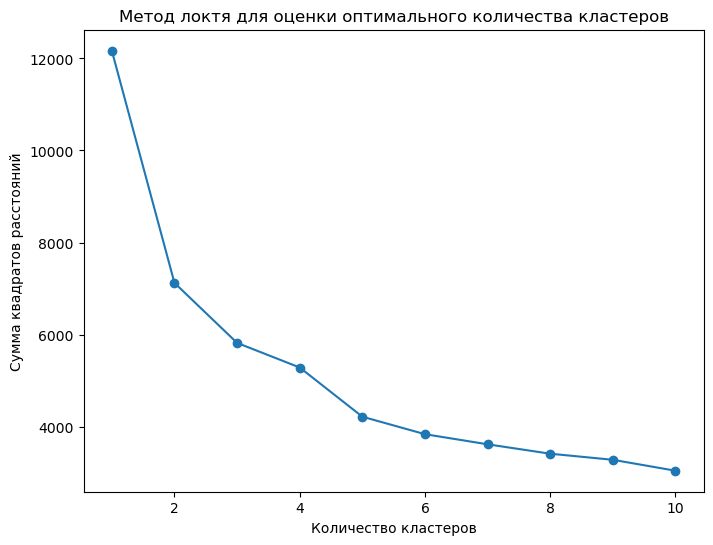

In [30]:
# Оценим оптимальное количество кластеров методом локтя
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя для оценки оптимального количества кластеров')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

Оптимальным количеством кластеров будет 3. Так и поделим. Добавим метки кластеров в датасет.

In [31]:
from sklearn.cluster import KMeans

# Создаем и обучаем модель K-средних
kmeans = KMeans(n_clusters=3)  # Укажем количество кластеров
kmeans.fit(data)

# Получаем метки кластеров и добавляем их к DataFrame
data['Cluster'] = kmeans.labels_

data.head()

C:\Users\mrrr_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Cluster
0,0.149183,0.504754,0.051689,0.257109,1.251218,0.296293,-0.206681,0.135702,-0.226085,0.754836,-0.397342,-0.345766,0.286460,-0.305616,-0.087656,0.372751,-0.322598,0.156242,2
1,-0.329335,-0.621895,0.114648,-0.840113,-0.594215,0.081845,-0.593049,0.516872,-0.606268,-0.345772,-0.586521,-0.619856,-0.500968,-0.045910,0.512906,0.150449,-0.003072,0.422623,2
2,-0.090076,-0.621895,-0.011269,-0.306329,0.143958,0.081845,-0.741652,0.643928,-0.606268,-0.345772,-0.901819,-0.737323,-1.439824,-1.214588,-0.087656,-0.294156,1.594555,1.488145,2
3,-1.047111,-0.139045,-0.766774,1.057785,5.065113,9.303101,-0.593049,0.516872,-0.606268,-0.276984,1.652100,-0.647824,0.407602,7.096015,0.512906,-0.183005,-1.440937,-1.708421,0
4,1.584736,1.953303,1.499740,0.079181,-1.455417,-0.561498,2.557335,-1.897200,2.815377,1.442716,2.881764,2.887382,2.709314,1.642182,-0.287843,-0.405307,-1.281174,-1.708421,1


# Оценка качества кластеризации

In [32]:
from sklearn.metrics import silhouette_score

# Вычисляем силуэт
silhouette_avg = silhouette_score(data, data['Cluster'])

print(f'Среднее значение силуэта: {silhouette_avg}')

Среднее значение силуэта: 0.3381381067783624


Среднее значение силуэта, равное примерно 0.338, указывает на то, что кластеры в вашей кластеризации достаточно компактны и хорошо разделены. Обычно значения силуэта ближе к 1 указывают на лучшую кластеризацию, но в некоторых случаях даже средние значения силуэта могут быть приемлемыми, особенно если данные сложные или имеют перекрывающиеся кластеры (как в нашем случае)

In [34]:
from sklearn.metrics import silhouette_samples
import numpy as np

def compute_silhouette(data, clusters):
    n_samples = len(data)
    silhouette_values = []

    unique_clusters = np.unique(clusters)
    cluster_dict = {cluster: data[clusters == cluster] for cluster in unique_clusters}

    for i in range(n_samples):
        # Получаем метку кластера для текущего объекта
        cluster_i = clusters[i]
        # Выделяем объекты из того же кластера
        samples_in_cluster = cluster_dict[cluster_i]
        # Рассчитываем среднее расстояние между текущим объектом и объектами из того же кластера
        a = np.mean(np.linalg.norm(samples_in_cluster - data[i], axis=1))
        
        # Рассчитываем среднее расстояние между текущим объектом и объектами из других кластеров
        b_values = []
        for cluster_j, samples_in_other_cluster in cluster_dict.items():
            if cluster_j != cluster_i:
                b_values.append(np.mean(np.linalg.norm(samples_in_other_cluster - data[i], axis=1)))
        
        # Выбираем минимальное значение из средних расстояний до объектов из других кластеров
        b = min(b_values) if b_values else 0
        
        # Вычисляем силуэт для текущего объекта
        silhouette_i = (b - a) / max(a, b)
        silhouette_values.append(silhouette_i)

    # Вычисляем среднее значение силуэта для всех объектов
    silhouette_avg = np.mean(silhouette_values)

    return silhouette_avg

# Вызываем функцию и выводим результат
silhouette_avg = compute_silhouette(data.values, data['Cluster'].values)
print(f'Среднее значение силуэта для всех объектов: {silhouette_avg}')

Среднее значение силуэта для всех объектов: 0.341060685788295


При подсчете собственной функцией (по формуле), значение получилось чуть больше - 0.34, что уже немного улучшает наш метод кластеризации.

# Интерпретация кластеров

In [38]:
cluster_groups = data.groupby('Cluster')

# Выводим описание каждого кластера
for label, cluster_df in cluster_groups:
    print("Cluster:", label)
    print(cluster_df.describe())  # Выводим статистическое описание кластера

Cluster: 0
       Compactness  Circularity  Distance_circularity  Radius_ratio  \
count   195.000000   195.000000            195.000000    195.000000   
mean     -0.949567    -0.514595             -0.902055     -1.059557   
std       0.518285     0.596576              0.563640      0.507690   
min      -2.482664    -1.909494             -2.529618     -1.937335   
25%      -1.286370    -1.104745             -1.207485     -1.373896   
50%      -0.927482    -0.460945             -0.892691     -1.107005   
75%      -0.568594    -0.139045             -0.577898     -0.840113   
max       0.508071     0.665704              0.303524      2.451553   

       Praxis_aspect_ratio  Max_length_aspect_ratio  Scatter_ratio  \
count           195.000000               195.000000     195.000000   
mean             -0.456675                -0.206284      -0.773354   
std               0.931460                 1.083891       0.370228   
min              -1.701475                -1.204841      -1.633270   

**Кластер 0:**
1) Наблюдения в этом кластере имеют низкую компактность, круглость
2) Прямоугольность и длина прямоугольника ниже среднего.
3) Этот кластер содержит 195 наблюдений.

**Кластер 1:**
1) Наблюдения в этом кластере характеризуются высокой компактностью, круглостью
2) Прямоугольность и длина прямоугольника выше среднего.
3) Этот кластер содержит 220 наблюдений.

**Кластер 2:**
1) Наблюдения в этом кластере обладают низкой компактностью, круглостью 
2) Максимальная длина чуть выше среднего.
3) Этот кластер содержит 261 наблюдение.





